In [2]:
library(tidyverse)
library(lubridate)
library(ggplot2)
library(tidyr)
library(dplyr)

In [3]:
options(warn = -1)

## Read the Input data

In [4]:
confirmedraw = read.csv("time_series_covid19_confirmed_global.csv")

deathsraw= read.csv("time_series_covid19_deaths_global.csv")

recoveredraw = read.csv("time_series_covid19_recovered_global.csv")

In [5]:
countryToContinent = read.csv("countryToContinent.csv")

countryToContinent$Continent = as.character(countryToContinent$Continent)
countryToContinent$Country = as.character(countryToContinent$Country)

In [6]:
head(countryToContinent)

,X,Continent,Country
,<int>,<chr>,<chr>
1,1,Africa,Algeria
2,2,Africa,Angola
3,3,Africa,Benin
4,4,Africa,Botswana
5,5,Africa,Burkina
6,6,Africa,Burundi


In [7]:
print(dim(confirmedraw))

print(dim(deathsraw))

print(dim(recoveredraw))

[1]  289 1017
[1]  289 1001
[1]  274 1001


In [8]:
head(recoveredraw)

,Province.State,Country.Region,Lat,Long,X1.22.2020,X1.23.2020,X1.24.2020,X1.25.2020,X1.26.2020,X1.27.2020,⋯,X10.5.2022,X10.6.2022,X10.7.2022,X10.8.2022,X10.9.2022,X10.10.2022,X10.11.2022,X10.12.2022,X10.13.2022,X10.14.2022
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,,Afghanistan,33.93911,67.70995,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,,Albania,41.15330,20.16830,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,,Algeria,28.03390,1.65960,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,,Andorra,42.50630,1.52180,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,,Angola,-11.20270,17.87390,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,,Antarctica,-71.94990,23.34700,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [9]:
formatTheData = function(data,colName) {
    
    covid_data = data %>% rename('subregion' = 'Province.State','country' = 'Country.Region')
    
    covid_data = covid_data %>%  pivot_longer(cols = -one_of('country','subregion','Lat','Long')
                ,names_to = 'date'
               ,values_to = colName
               )
    
    covid_data$date <- covid_data$date %>% sub("X", "", .)
    
    covid_data$date = mdy(covid_data$date)

    covid_data = covid_data %>% arrange(date)
   
    covid_data$Lat = round(covid_data$Lat,3)

    covid_data$Long = round(covid_data$Long,3)
    
    #covid_data = merge(countryToContinent,covid_data,  by.y = "Country", by.x = "Country.Region")

    print(unique(format(covid_data$date, "%Y")))
    print(dim(covid_data))
    
    covid_data  = covid_data[covid_data$country != 'canada',]
    return(data.frame(covid_data))
}

In [10]:
case.conf = formatTheData(confirmedraw,"conf")
case.death = formatTheData(deathsraw,"death")
case.recov = formatTheData(recoveredraw,"recov")

[1] "2020" "2021" "2022"
[1] 292757      6
[1] "2020" "2021" "2022"
[1] 288133      6
[1] "2020" "2021" "2022"
[1] 273178      6


In [11]:
head(case.conf)

,subregion,country,Lat,Long,date,conf
,<chr>,<chr>,<dbl>,<dbl>,<date>,<int>
1,,Afghanistan,33.939,67.710,2020-01-22,0
2,,Albania,41.153,20.168,2020-01-22,0
3,,Algeria,28.034,1.660,2020-01-22,0
4,,Andorra,42.506,1.522,2020-01-22,0
5,,Angola,-11.203,17.874,2020-01-22,0
6,,Antarctica,-71.950,23.347,2020-01-22,0


In [12]:
#case.conf = case.conf[case.conf$country!= 'Canada' & case.conf$country!= 'China',]
#case.death = case.death[case.death$country!= 'Canada' & case.death$country!= 'China',]
#case.recov = case.recov[case.recov$country!= 'Canada' & case.recov$country!= 'China',]

In [13]:
#case.conf[case.conf$country == 'Canada',]

In [14]:
#head(case.conf)
head(case.conf %>% arrange(country))

,subregion,country,Lat,Long,date,conf
,<chr>,<chr>,<dbl>,<dbl>,<date>,<int>
1,,Afghanistan,33.939,67.71,2020-01-22,0
2,,Afghanistan,33.939,67.71,2020-01-23,0
3,,Afghanistan,33.939,67.71,2020-01-24,0
4,,Afghanistan,33.939,67.71,2020-01-25,0
5,,Afghanistan,33.939,67.71,2020-01-26,0
6,,Afghanistan,33.939,67.71,2020-01-27,0


In [15]:
tail(case.conf)

,subregion,country,Lat,Long,date,conf
,<chr>,<chr>,<dbl>,<dbl>,<date>,<int>
292752,,Vietnam,14.058,108.277,2022-10-30,11502474
292753,,West Bank and Gaza,31.952,35.233,2022-10-30,703014
292754,,Winter Olympics 2022,39.904,116.407,2022-10-30,535
292755,,Yemen,15.553,48.516,2022-10-30,11939
292756,,Zambia,-13.134,27.849,2022-10-30,333681
292757,,Zimbabwe,-19.015,29.155,2022-10-30,257893


In [16]:
tail(case.death)

,subregion,country,Lat,Long,date,death
,<chr>,<chr>,<dbl>,<dbl>,<date>,<int>
288128,,Vietnam,14.058,108.277,2022-10-14,43155
288129,,West Bank and Gaza,31.952,35.233,2022-10-14,5707
288130,,Winter Olympics 2022,39.904,116.407,2022-10-14,0
288131,,Yemen,15.553,48.516,2022-10-14,2158
288132,,Zambia,-13.134,27.849,2022-10-14,4017
288133,,Zimbabwe,-19.015,29.155,2022-10-14,5605


In [17]:
head(case.recov)

,subregion,country,Lat,Long,date,recov
,<chr>,<chr>,<dbl>,<dbl>,<date>,<int>
1,,Afghanistan,33.939,67.710,2020-01-22,0
2,,Albania,41.153,20.168,2020-01-22,0
3,,Algeria,28.034,1.660,2020-01-22,0
4,,Andorra,42.506,1.522,2020-01-22,0
5,,Angola,-11.203,17.874,2020-01-22,0
6,,Antarctica,-71.950,23.347,2020-01-22,0


In [18]:
full_date = full_join(case.conf, case.death, by = c('subregion','country','Lat','Long', 'date'))

country = full_join(full_date, case.recov, by = c('subregion','country','Lat','Long', 'date'))

In [19]:
sum(is.na(country))

[1] 37228

In [20]:
country = country %>% filter(!is.na(Lat) & !is.na(Long) & !is.na(conf) & !is.na(death) & !is.na(recov))

country = country[country$recov >=0 & country$death >=0 & country$conf >=0,]

In [21]:
sum(is.na(country))

[1] 0

In [22]:
dim(country)

[1] 269182      8

## Insight into Confimed Cases Country wise

In [23]:
conf_Cases_country <- data.frame(country = NA,totalCases = NA)

df = country
cofimed_country = data

getConfirmedCasesCounrywise = function(country)
{
    df = df[df$country == country,]

    df$conf_daily = df[2:dim(df)[1],]$conf - df[1:dim(df)[1],]$conf
    
    df$conf_daily <- ifelse(df$conf_daily < 0,0,df$conf_daily)
    
    return (data.frame(country = country,totalCases = sum(df$conf_daily)))
}

In [24]:
for(c in unique(country$country))
    {
    conf_Cases_country = rbind(conf_Cases_country,getConfirmedCasesCounrywise(c))
}

conf_Cases_country = conf_Cases_country %>% filter(!is.na(totalCases))

colnames(conf_Cases_country)[2] <- "totalCases_conf"

top_10_Country_Highest_ConfCases = head(conf_Cases_country %>% arrange(desc(totalCases_conf)),10)

top_10_Country_Highest_ConfCases$totalCases_conf =  top_10_Country_Highest_ConfCases$totalCases_conf / 1000000

In [25]:
top_10_Country_Highest_ConfCases

,country,totalCases_conf
,<chr>,<dbl>
1,France,10253.23171
2,United Kingdom,8528.67994
3,Netherlands,2813.86249
4,Australia,1418.54862
5,Denmark,945.82250
6,China,379.03328
7,New Zealand,288.74450
8,US,96.93127
9,India,44.62659


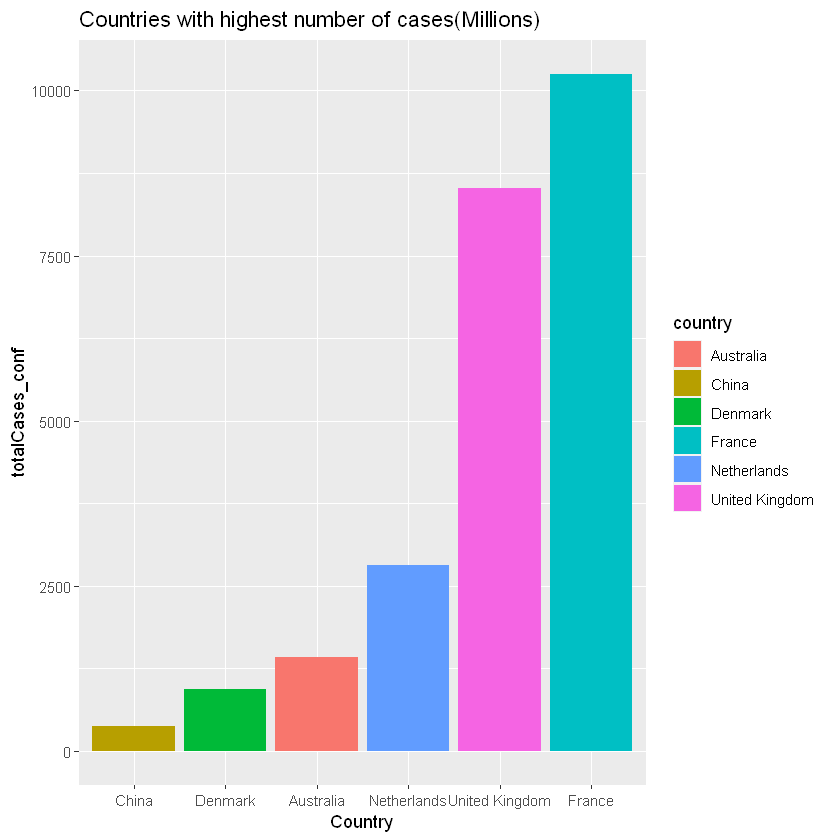

In [26]:
ggplot(data = head(top_10_Country_Highest_ConfCases),aes(x = reorder(country,totalCases_conf),
                                                         y = totalCases_conf,fill = country)) + geom_bar(stat = "identity") + 
                    labs(title = "Countries with highest number of cases(Millions)") + xlab("Country")

In [27]:
top_10_Country_lowest_ConfCases = tail(conf_Cases_country %>% arrange(desc(totalCases_conf)),10)

top_10_Country_lowest_ConfCases

,country,totalCases_conf
,<chr>,<dbl>
191,Nauru,4611
192,Kiribati,3434
193,Summer Olympics 2020,865
194,Diamond Princess,712
195,Winter Olympics 2022,535
196,Holy See,29
197,Tuvalu,20
198,Antarctica,11
199,MS Zaandam,9


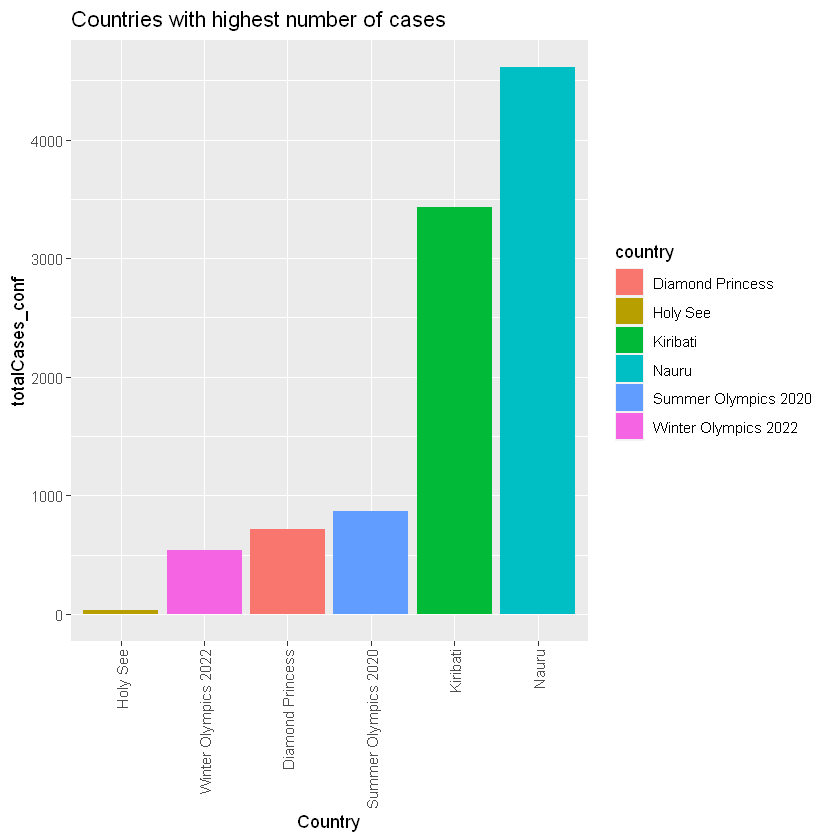

In [28]:
ggplot(data = head(top_10_Country_lowest_ConfCases),aes(x = reorder(country,totalCases_conf),
                                                        y = totalCases_conf,fill = country)) + 
                geom_bar(stat = "identity") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
                    labs(title = "Countries with highest number of cases") + xlab("Country")

In [29]:
sum(case.conf[case.conf$country == 'Afghanistan',]$conf)

[1] 103047163

## Insight into Daily Trend on Confirmed Cases

In [30]:
conf_Cases_daily = data.frame(country %>% group_by(date) %>% summarise(confCases = sum(conf)))

head(conf_Cases_daily)

,date,confCases
,<date>,<int>
1,2020-01-22,551
2,2020-01-23,649
3,2020-01-24,930
4,2020-01-25,1394
5,2020-01-26,2021
6,2020-01-27,2780


In [31]:
conf_Cases_daily$DailyTrend = conf_Cases_daily[2:dim(conf_Cases_daily)[1],'confCases'] - 
                                    conf_Cases_daily[1:dim(conf_Cases_daily)[1],'confCases']

conf_Cases_daily$DailyTrend <- ifelse(conf_Cases_daily$DailyTrend < 0,0,conf_Cases_daily$DailyTrend)

In [32]:
tail(conf_Cases_daily)

,date,confCases,DailyTrend
,<date>,<int>,<dbl>
992,2022-10-09,616397480,501317
993,2022-10-10,616898797,646171
994,2022-10-11,617544968,554892
995,2022-10-12,618099860,620146
996,2022-10-13,618720006,445052
997,2022-10-14,619165058,0


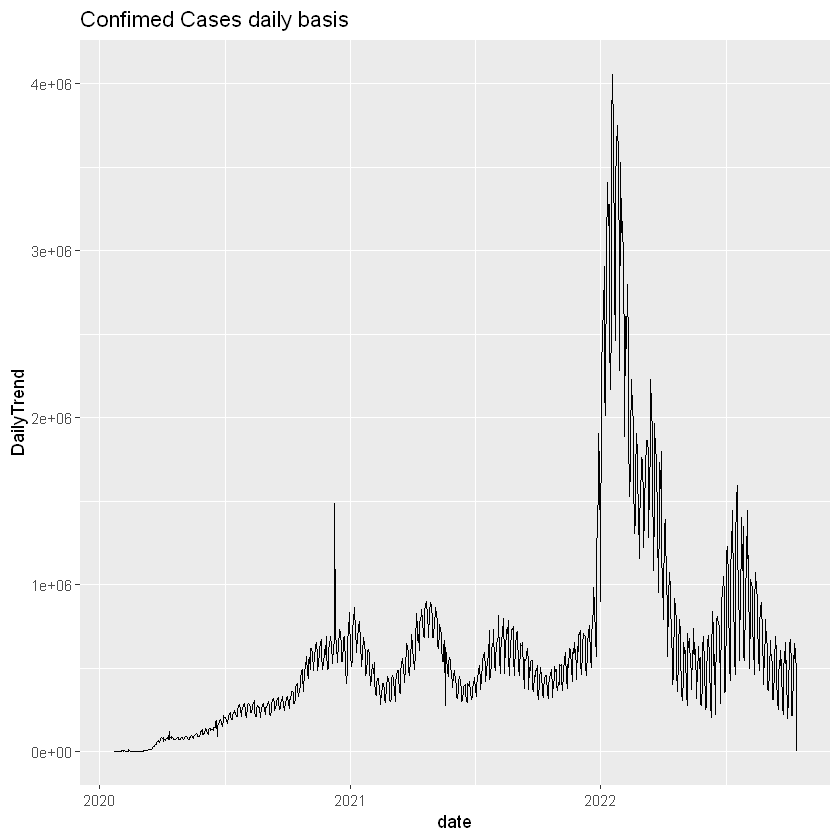

In [33]:
ggplot(conf_Cases_daily,aes(x = date, y = DailyTrend)) + 
        geom_line() + 
        labs(title = "Confimed Cases daily basis")

## Insight into 'Death' Cases Country wise

In [34]:
death_Cases_country <- data.frame(country = NA,totalCases = NA)

df = country

getDeathCasesCounrywise = function(country)
{
    df = df[df$country == country,]

    df$death_daily = df[2:dim(df)[1],]$death - df[1:dim(df)[1],]$death
    
    df$death_daily <- ifelse(df$death_daily < 0,0,df$death_daily)
    
    return (data.frame(country = country,totalCases = sum(df$death_daily)))
}

In [35]:
for(c in unique(country$country))
    {
    death_Cases_country = rbind(death_Cases_country,getDeathCasesCounrywise(c))
}

death_Cases_country = death_Cases_country %>% filter(!is.na(totalCases))

colnames(death_Cases_country)[2] <- "totalCases_death"

In [36]:
top_10_Country_Highest_deathCases = head(death_Cases_country %>% arrange(desc(totalCases_death)),10)

top_10_Country_Highest_deathCases$totalCases_death =  top_10_Country_Highest_deathCases$totalCases_death / 100000

In [37]:
top_10_Country_Highest_deathCases

,country,totalCases_death
,<chr>,<dbl>
1,United Kingdom,1289.62312
2,France,883.88017
3,Netherlands,145.16931
4,China,54.43379
5,Denmark,27.65770
6,Australia,27.25286
7,US,10.65604
8,Brazil,6.87227
9,India,5.28875


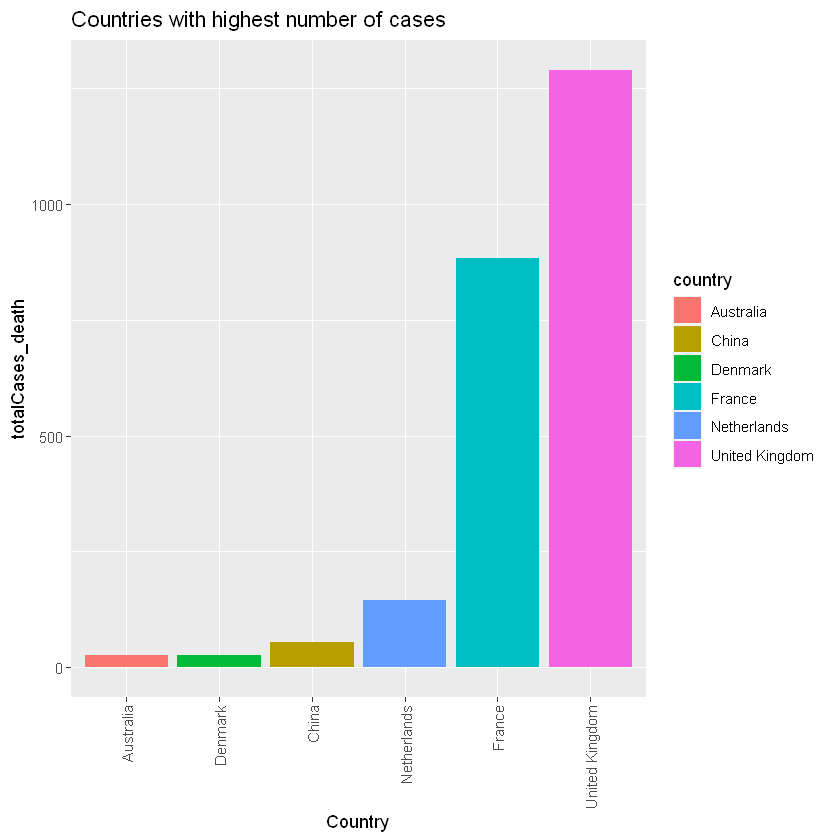

In [38]:
ggplot(data = head(top_10_Country_Highest_deathCases),aes(x = reorder(country,totalCases_death),
                                                          y = totalCases_death,fill = country)) + 
                geom_bar(stat = "identity") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
                    labs(title = "Countries with highest number of cases") + xlab("Country")

In [39]:
top_10_Country_lowest_DeathCases = tail(death_Cases_country %>% arrange(desc(totalCases_death)),10)

In [40]:
head(top_10_Country_lowest_DeathCases)

,country,totalCases_death
,<chr>,<dbl>
191,Tonga,13
192,Palau,7
193,"Korea, North",6
194,MS Zaandam,2
195,Nauru,1
196,Antarctica,0


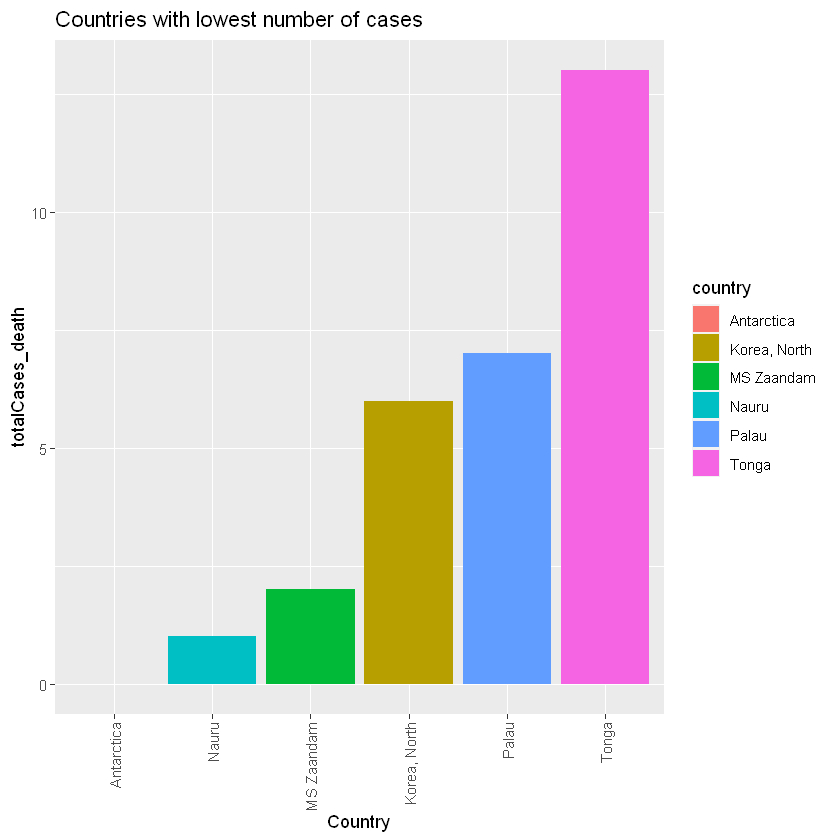

In [41]:
ggplot(data = head(top_10_Country_lowest_DeathCases),aes(x = reorder(country,totalCases_death),
                                                         y = totalCases_death,fill = country)) + 
                geom_bar(stat = "identity") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
                    labs(title = "Countries with lowest number of cases") + xlab("Country")

In [42]:
death_Cases_daily = data.frame(country %>% group_by(date) %>% summarise(deathCases = sum(death)))

head(conf_Cases_daily)

,date,confCases,DailyTrend
,<date>,<int>,<dbl>
1,2020-01-22,551,98
2,2020-01-23,649,281
3,2020-01-24,930,464
4,2020-01-25,1394,627
5,2020-01-26,2021,759
6,2020-01-27,2780,2595


In [43]:
death_Cases_daily$DailyTrend = death_Cases_daily[2:dim(death_Cases_daily)[1],'deathCases'] - 
                                    death_Cases_daily[1:dim(death_Cases_daily)[1],'deathCases']

death_Cases_daily$DailyTrend <- ifelse(death_Cases_daily$DailyTrend < 0,0,death_Cases_daily$DailyTrend)

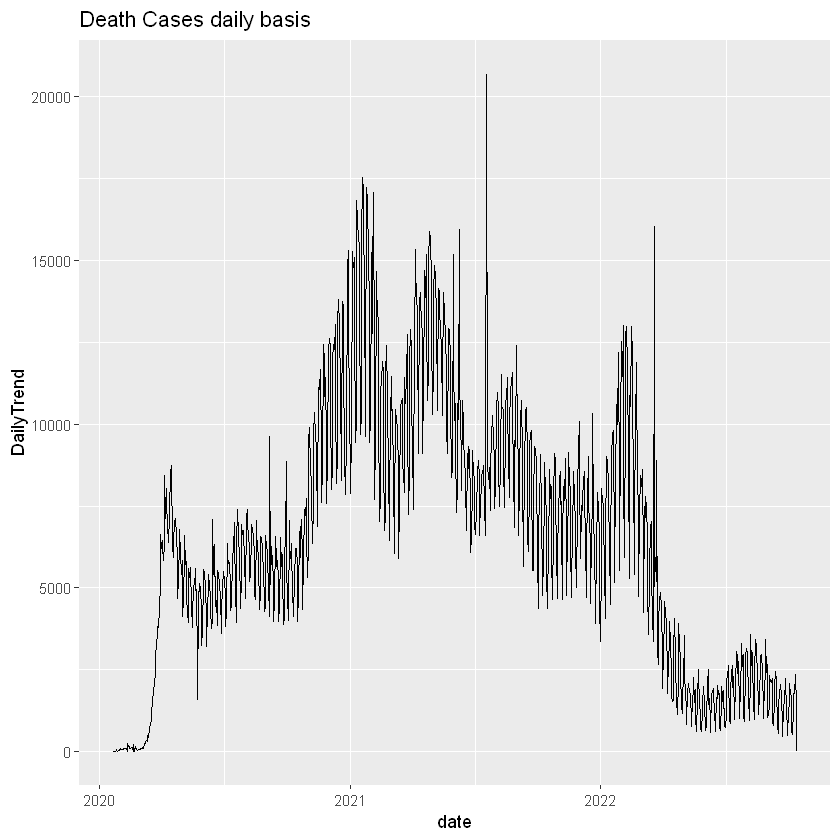

In [44]:
ggplot(death_Cases_daily,aes(x = date, y = DailyTrend)) + 
        geom_line() + 
        labs(title = "Death Cases daily basis")

In [45]:
tail(country)

,subregion,country,Lat,Long,date,conf,death,recov
,<chr>,<chr>,<dbl>,<dbl>,<date>,<int>,<int>,<int>
269185,,Vietnam,14.058,108.277,2022-10-14,11491541,43155,0
269186,,West Bank and Gaza,31.952,35.233,2022-10-14,702804,5707,0
269187,,Winter Olympics 2022,39.904,116.407,2022-10-14,535,0,0
269188,,Yemen,15.553,48.516,2022-10-14,11939,2158,0
269189,,Zambia,-13.134,27.849,2022-10-14,333624,4017,0
269190,,Zimbabwe,-19.015,29.155,2022-10-14,257827,5605,0


## Insight into 'Recovered' Cases Country wise

In [46]:
recov_Cases_country <- data.frame(country = NA,totalCases = NA)

df = country

getRecovCasesCounrywise = function(country)
{
    df = df[df$country == country,]

    df$recov_daily = df[2:dim(df)[1],]$recov - df[1:dim(df)[1],]$recov
    
    df$recov_daily <- ifelse(df$recov_daily < 0,0,df$recov_daily)
    
    return (data.frame(country = country,totalCases = sum(df$recov_daily)))
}

In [47]:
for(c in unique(country$country))
    {
    recov_Cases_country = rbind(recov_Cases_country,getRecovCasesCounrywise(c))
}

recov_Cases_country = recov_Cases_country %>% filter(!is.na(totalCases))

colnames(recov_Cases_country)[2] <- "totalCases_recov"

In [48]:
top_10_Country_Highest_recovCases = head(recov_Cases_country %>% arrange(desc(totalCases_recov)),10)

top_10_Country_Highest_recovCases$totalCases_recov =  top_10_Country_Highest_recovCases$totalCases_recov / 1000000

In [49]:
top_10_Country_Highest_recovCases

,country,totalCases_recov
,<chr>,<dbl>
1,France,89.778865
2,Denmark,57.572798
3,China,36.311770
4,India,30.977006
5,Brazil,17.771228
6,Australia,7.866022
7,US,6.303715
8,Russia,5.609682
9,Turkey,5.478185


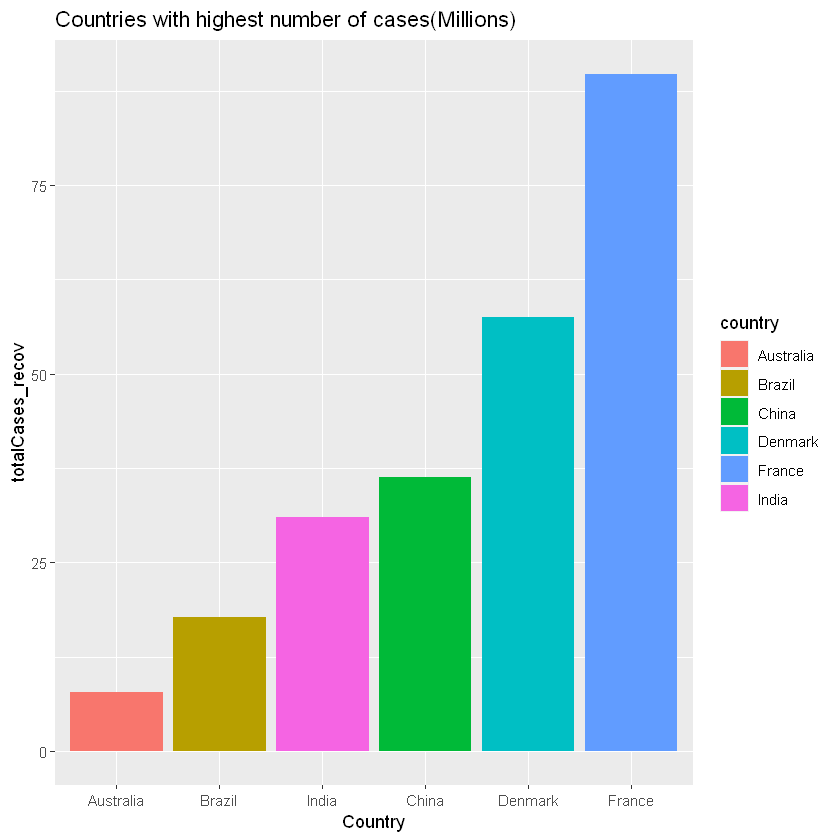

In [50]:
ggplot(data = head(top_10_Country_Highest_recovCases),aes(x = reorder(country,totalCases_recov),
                                                          y = totalCases_recov,fill = country)) + 
                geom_bar(stat = "identity") + 
                    labs(title = "Countries with highest number of cases(Millions)") + xlab("Country")

In [51]:
top_10_Country_lowest_recovCases = tail(recov_Cases_country %>% arrange(desc(totalCases_recov)),20)

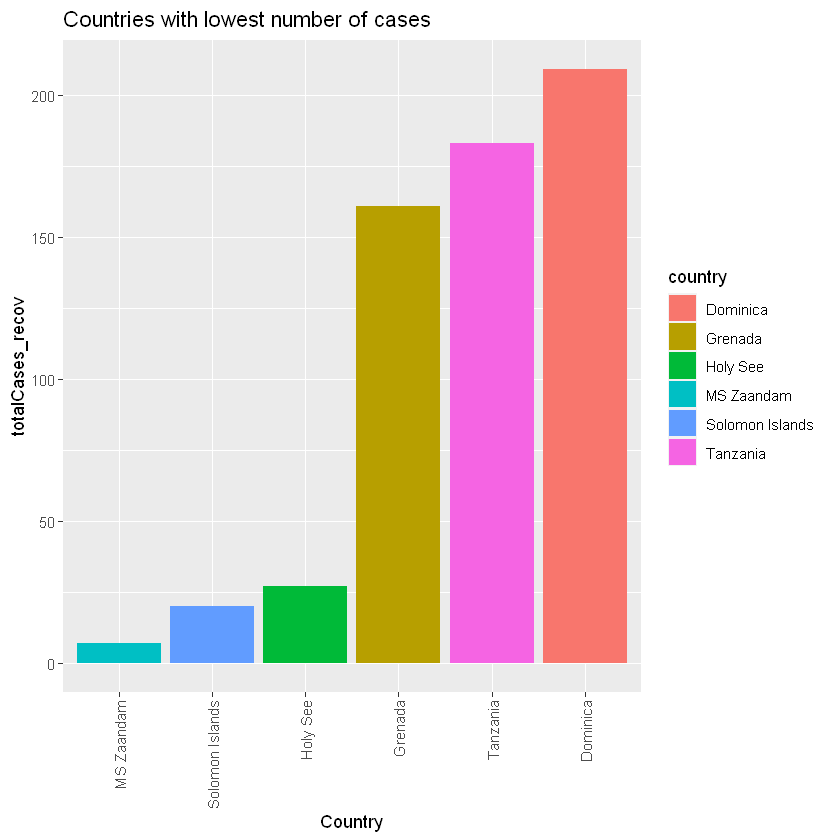

In [52]:
ggplot(data = head(top_10_Country_lowest_recovCases),aes(x = reorder(country,totalCases_recov),
                                                         y = totalCases_recov,fill = country)) + 
                geom_bar(stat = "identity") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
                    labs(title = "Countries with lowest number of cases") + xlab("Country")

In [53]:
recov_Cases_daily = data.frame(country %>% group_by(date) %>% summarise(recovCases = sum(recov)))

head(recov_Cases_daily)

,date,recovCases
,<date>,<int>
1,2020-01-22,30
2,2020-01-23,32
3,2020-01-24,39
4,2020-01-25,42
5,2020-01-26,56
6,2020-01-27,65


In [54]:
recov_Cases_daily$DailyTrend = recov_Cases_daily[2:dim(recov_Cases_daily)[1],'recovCases'] - 
                                    recov_Cases_daily[1:dim(recov_Cases_daily)[1],'recovCases']

recov_Cases_daily$DailyTrend <- ifelse(recov_Cases_daily$DailyTrend < 0,0,recov_Cases_daily$DailyTrend)

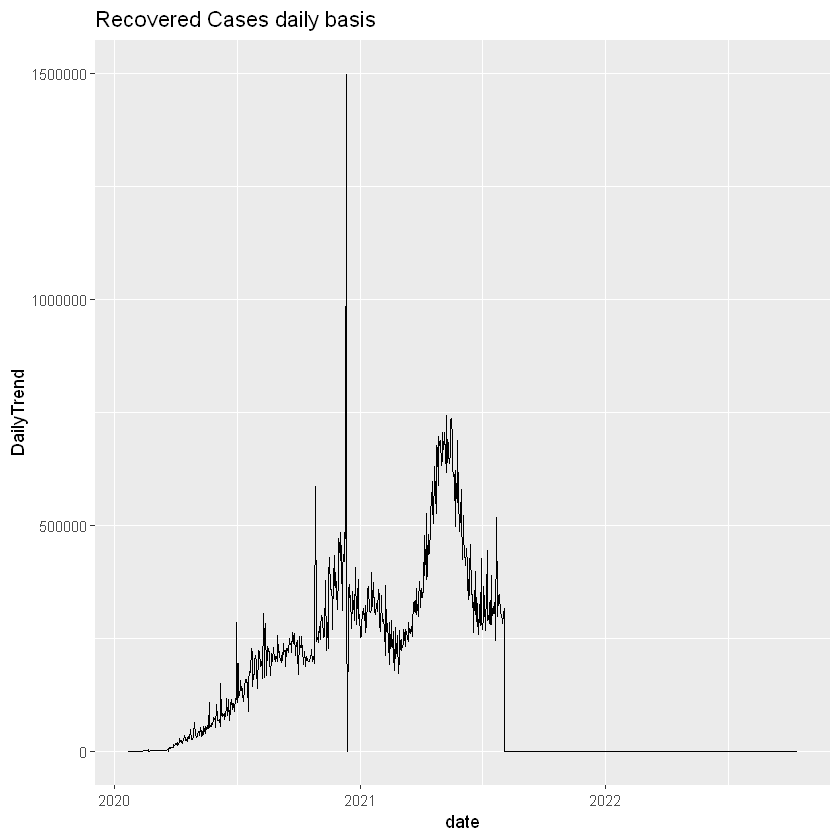

In [55]:
ggplot(recov_Cases_daily,aes(x = date, y = DailyTrend)) + 
        geom_line() + 
        labs(title = "Recovered Cases daily basis")

# All kind of cases in one plot daily basis

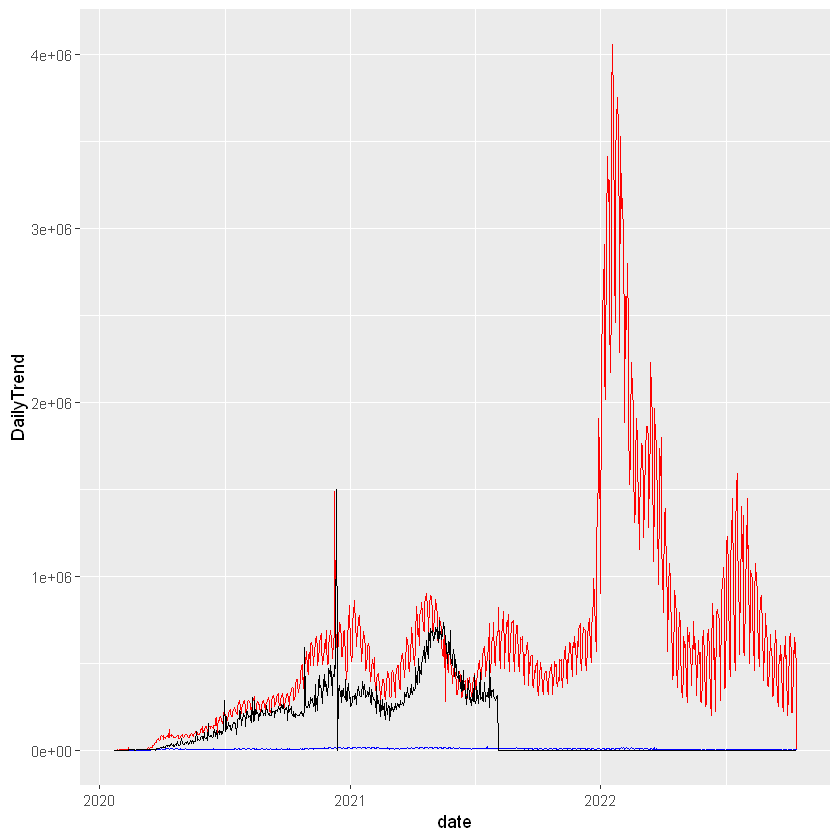

In [56]:
ggplot() + geom_line(data =conf_Cases_daily, aes(x=date,y=DailyTrend),color='red') + 
           geom_line(data =death_Cases_daily, aes(x=date,y=DailyTrend),color='blue') + 
           geom_line(data =recov_Cases_daily, aes(x=date,y=DailyTrend),color='black') + geom_point()

In [57]:
df_list <- list(conf_Cases_country, death_Cases_country, recov_Cases_country)
df_list <- df_list %>% reduce(full_join, by='country')

In [58]:
head(df_list)

,country,totalCases_conf,totalCases_death,totalCases_recov
,<chr>,<dbl>,<dbl>,<dbl>
1,Afghanistan,201022,7809,82614
2,Albania,332598,3591,130314
3,Algeria,270734,6881,118523
4,Andorra,46366,157,14382
5,Angola,103131,1920,39889
6,Antarctica,11,0,0


## Correlation between cases 'Confirmed' and 'Recovered'

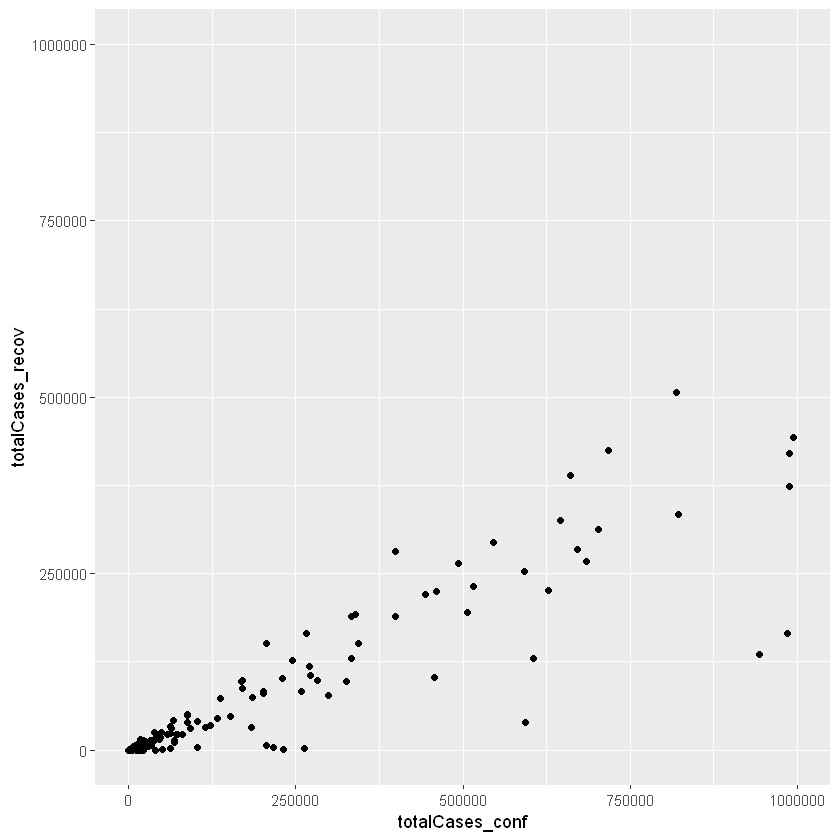

In [59]:
ggplot(df_list,aes(x = totalCases_conf,y = totalCases_recov)) + geom_point() + ylim(0,1000000) + xlim(0,1000000)

## Correlation between cases 'Confirmed' and 'Death'

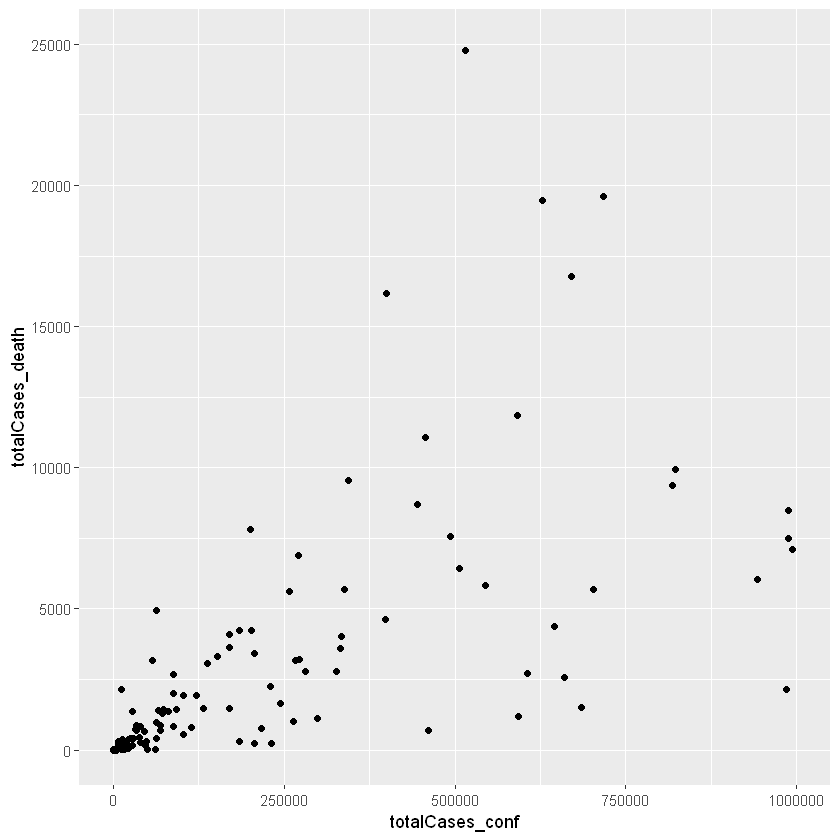

In [60]:
ggplot(df_list,aes(x = totalCases_conf,y = totalCases_death)) + geom_point() + ylim(0,25000) + xlim(0,1000000)

In [61]:
df_list$totalCases_conf = df_list$totalCases_conf /1000000
df_list$totalCases_death = df_list$totalCases_death /1000000
df_list$totalCases_recov = df_list$totalCases_recov /1000000

In [62]:
head(df_list %>% arrange(desc(totalCases_conf)),10)

,country,totalCases_conf,totalCases_death,totalCases_recov
,<chr>,<dbl>,<dbl>,<dbl>
1,France,10253.23171,88.388017,89.778865
2,United Kingdom,8528.67994,128.962312,3.135827
3,Netherlands,2813.86249,14.516931,4.210989
4,Australia,1418.54862,2.725286,7.866022
5,Denmark,945.82250,2.765770,57.572798
6,China,379.03328,5.443379,36.311770
7,New Zealand,288.74450,0.280475,0.964499
8,US,96.93127,1.065604,6.303715
9,India,44.62659,0.528875,30.977006


## Mortality Rate and Recovery Rate

In [63]:
# Mortality rate can be defined as the ratio of number of deaths recorded against the total number of cases recorded and this 
# is calculated using the following formula:

In [64]:
df_list[df_list$country == 'India',]

,country,totalCases_conf,totalCases_death,totalCases_recov
,<chr>,<dbl>,<dbl>,<dbl>
80,India,44.62659,0.528875,30.97701


In [65]:
df_list = mutate(df_list,recovery_rate = totalCases_recov / totalCases_conf)

df_list = mutate(df_list,mortality_rate = totalCases_death / totalCases_conf)

## Order based on the highest 'death rate'

In [66]:
head(df_list %>% arrange(desc(mortality_rate)))

,country,totalCases_conf,totalCases_death,totalCases_recov,recovery_rate,mortality_rate
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,"Korea, North",0.000001,0.000006,0.000000,0.0000000,6.00000000
2,MS Zaandam,0.000009,0.000002,0.000007,0.7777778,0.22222222
3,Yemen,0.011940,0.002158,0.004251,0.3560302,0.18073702
4,Sudan,0.063388,0.004963,0.030647,0.4834827,0.07829558
5,Syria,0.057332,0.003163,0.022019,0.3840613,0.05516989
6,Peru,4.152584,0.217580,2.088905,0.5030374,0.05239629


## Order based on the highest 'recovery_rate'

In [67]:
head(df_list %>% arrange(desc(recovery_rate)))

,country,totalCases_conf,totalCases_death,totalCases_recov,recovery_rate,mortality_rate
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Diamond Princess,0.000712,0.000013,0.000700,0.9831461,0.01825843
2,Holy See,0.000029,0.000000,0.000027,0.9310345,0.00000000
3,Tajikistan,0.017786,0.000125,0.015038,0.8454965,0.00702800
4,MS Zaandam,0.000009,0.000002,0.000007,0.7777778,0.22222222
5,Colombia,6.308558,0.141820,4.681505,0.7420880,0.02248057
6,Djibouti,0.015690,0.000189,0.011491,0.7323773,0.01204589


In [68]:
df_list <- list(conf_Cases_country, death_Cases_country, recov_Cases_country)
df_list <- df_list %>% reduce(full_join, by='country')

## World Reported Cases

In [69]:
sum(df_list$totalCases_conf) /1000000000 # in billion

[1] 25.16077

In [70]:
sum(df_list$totalCases_death) /1000000 # Million

[1] 249.1793

In [71]:
sum(df_list$totalCases_recov) /1000000 # Million

[1] 335.0536

## Average Cases worldwide Recoved on daily wise

In [72]:
# recov_Cases_daily

recov_Cases_daily %>% summarise("mean( in lakh)" = mean(DailyTrend)) /100000 

mean( in lakh)
<dbl>
1.358945


In [73]:
## Average Cases worldwide Confirmed on daily wise

In [74]:
conf_Cases_daily %>% summarise("mean( in lakh)" = mean(DailyTrend)) / 100000

mean( in lakh)
<dbl>
6.210276


In [75]:
## Average Cases worldwide Recoved on daily wise

In [76]:
death_Cases_daily %>% summarise("mean( in thousands)" = mean(DailyTrend))/ 1000

mean( in thousands)
<dbl>
6.540097


In [77]:
## Plot Recovery and Death Rate

In [78]:
tail(country)

,subregion,country,Lat,Long,date,conf,death,recov
,<chr>,<chr>,<dbl>,<dbl>,<date>,<int>,<int>,<int>
269185,,Vietnam,14.058,108.277,2022-10-14,11491541,43155,0
269186,,West Bank and Gaza,31.952,35.233,2022-10-14,702804,5707,0
269187,,Winter Olympics 2022,39.904,116.407,2022-10-14,535,0,0
269188,,Yemen,15.553,48.516,2022-10-14,11939,2158,0
269189,,Zambia,-13.134,27.849,2022-10-14,333624,4017,0
269190,,Zimbabwe,-19.015,29.155,2022-10-14,257827,5605,0


In [79]:
daily = country %>% select('date','recov','conf','death') %>% group_by(date) %>% summarise(total_recov = sum(recov),
                                                                                           total_conf = sum(conf),
                                                                                           total_death = sum(death))

In [80]:
head(daily)

date,total_recov,total_conf,total_death
<date>,<int>,<int>,<int>
2020-01-22,30,551,17
2020-01-23,32,649,17
2020-01-24,39,930,25
2020-01-25,42,1394,41
2020-01-26,56,2021,54
2020-01-27,65,2780,80


In [81]:
daily = mutate(daily,recovery_rate = total_recov / total_conf)

daily = mutate(daily,mortality_rate = total_death / total_conf)

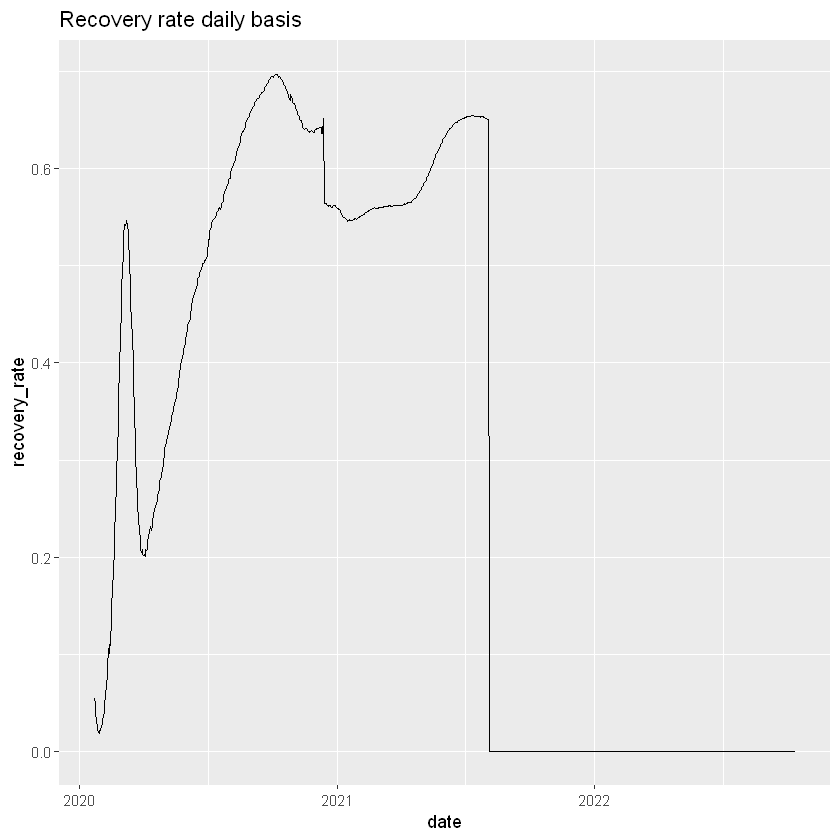

In [82]:
ggplot(daily,aes(x = date, y = recovery_rate)) + 
        geom_line() + 
        labs(title = "Recovery rate daily basis")

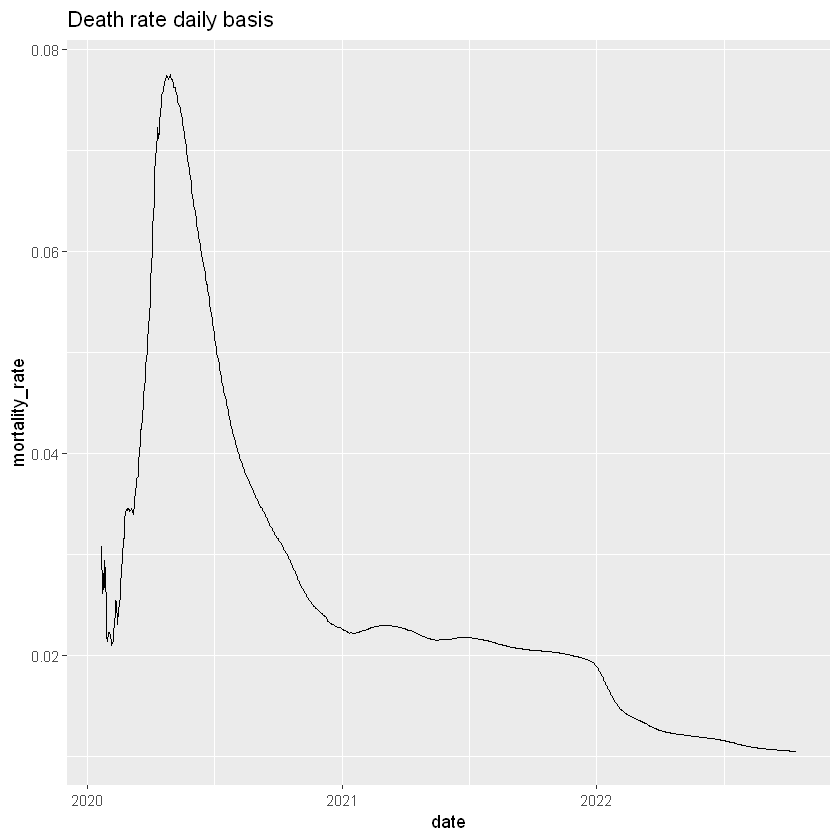

In [83]:
ggplot(daily,aes(x = date, y = mortality_rate)) + 
        geom_line() + 
        labs(title = "Death rate daily basis")

In [84]:
# Analyze Active Cases

In [85]:
country$Active = country$conf -  country$death - country$recov

country = country[country$Active>=0 & country$recov>=0,]

In [86]:
head(country[country$recov !=0,])

,subregion,country,Lat,Long,date,conf,death,recov,Active
,<chr>,<chr>,<dbl>,<dbl>,<date>,<int>,<int>,<int>,<int>
55,Hubei,China,30.976,112.271,2020-01-22,444,17,28,399
234,,Thailand,15.870,100.993,2020-01-22,4,0,2,2
319,Guangdong,China,23.342,113.424,2020-01-23,32,0,2,30
325,Hubei,China,30.976,112.271,2020-01-23,444,17,28,399
504,,Thailand,15.870,100.993,2020-01-23,4,0,2,2
585,Beijing,China,40.182,116.414,2020-01-24,36,0,1,35


In [87]:
length(unique(country$country))

[1] 200

In [88]:
length(unique(countryToContinent$Country))

[1] 202